Estimate employee headcount, for each company, on each day, from 2011/01/24 to 2015/12/13

What are the main factors that drive employee churn? Do they make sense? Explain your findings.

If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [69]:
import pandas as pd
import matplotlib
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline

data = pd.read_csv('employee_retention_data.csv')
data['join_date'] = pd.to_datetime(data['join_date'])
data['quit_date'] = pd.to_datetime(data['quit_date'])
data['duration'] = (data['quit_date'] - data['join_date']).apply(lambda x: None if pd.isnull(x) else x.days)
data['quit']     = ~data['duration'].isnull()

In [70]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,duration,quit
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,True
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,True
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT,NaN,False
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,True
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,True


In [18]:
data.describe()

,employee_id,company_id,seniority,salary,duration
count,24702.000000,24702.000000,24702.000000,24702.000000,13510
mean,501604.403530,3.426969,14.127803,138183.345478,613 days 11:41:01.643227
std,288909.026101,2.700011,8.089520,76058.184573,328 days 14:56:33.800149
min,36.000000,1.000000,1.000000,17000.000000,102 days 00:00:00
25%,250133.750000,1.000000,7.000000,79000.000000,361 days 00:00:00
50%,500793.000000,2.000000,14.000000,123000.000000,417 days 00:00:00
75%,753137.250000,5.000000,21.000000,187000.000000,781 days 00:00:00
max,999969.000000,12.000000,99.000000,408000.000000,1726 days 00:00:00


## Exploration

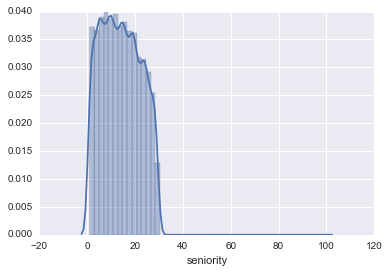

In [49]:
sns.distplot(data['seniority'])

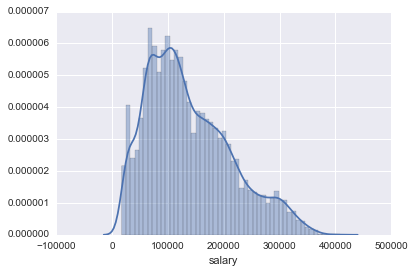

In [51]:
sns.distplot(data['salary'])

In [105]:
quit_ = data[~data.duration.isnull()]

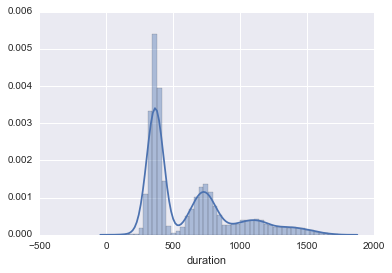

In [106]:
sns.distplot(quit_['duration'])

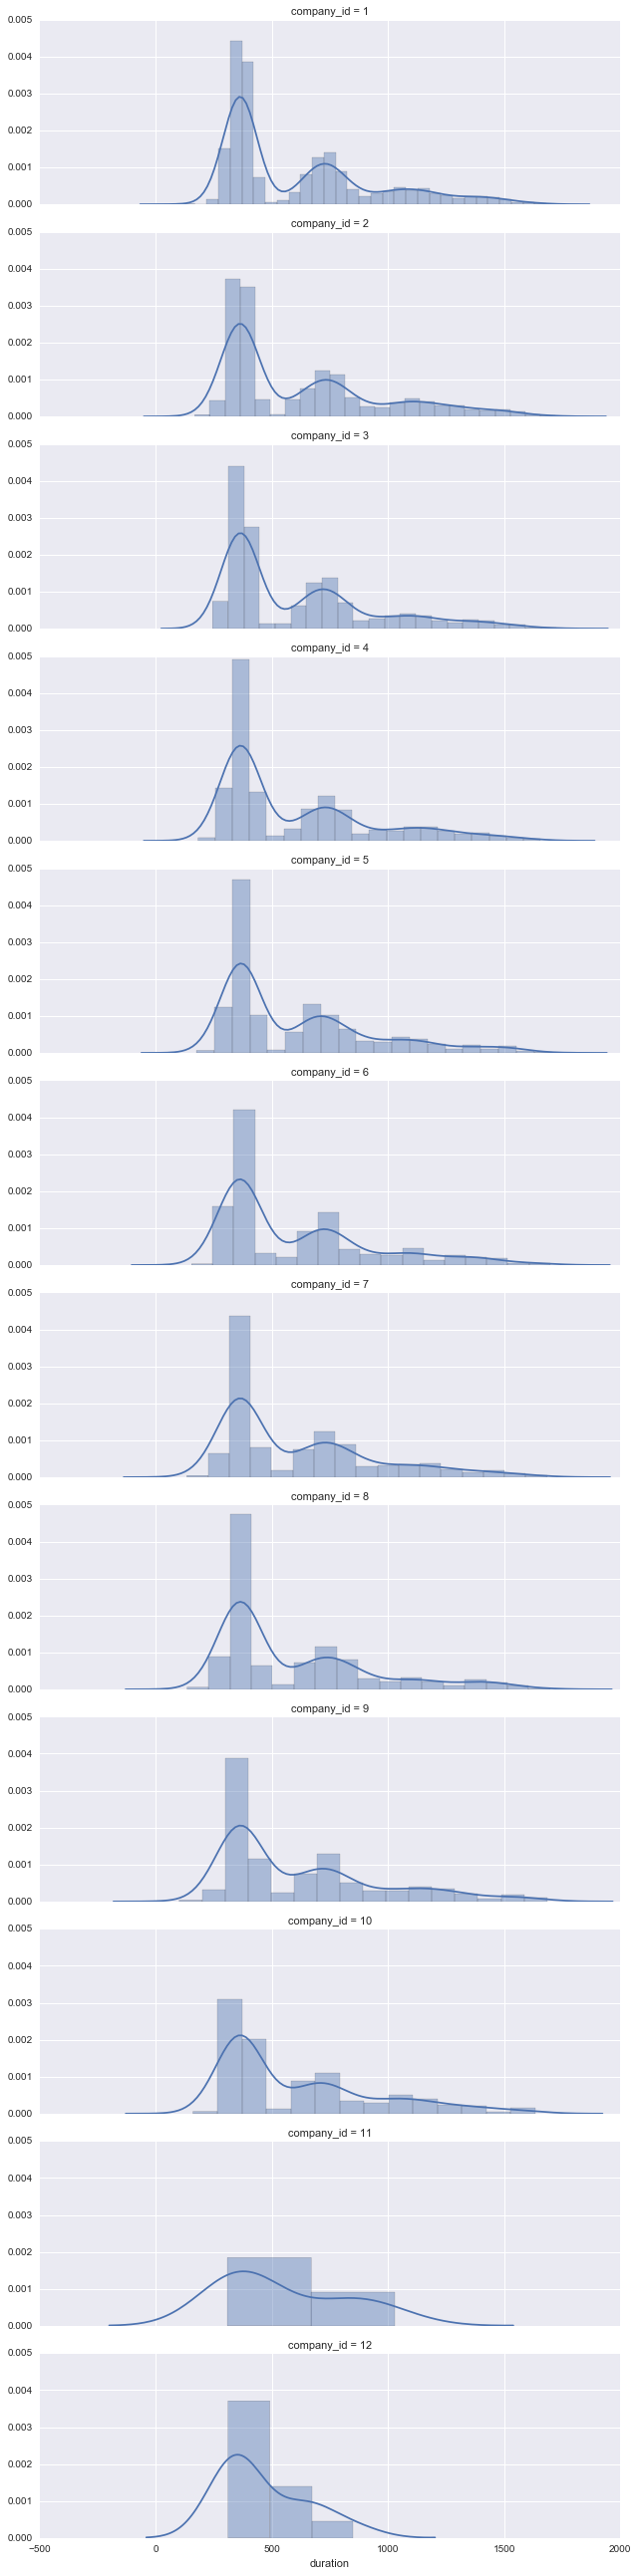

In [107]:
g = sns.FacetGrid(quit_, row='company_id', aspect=3)
g = g.map(sns.distplot, "duration")

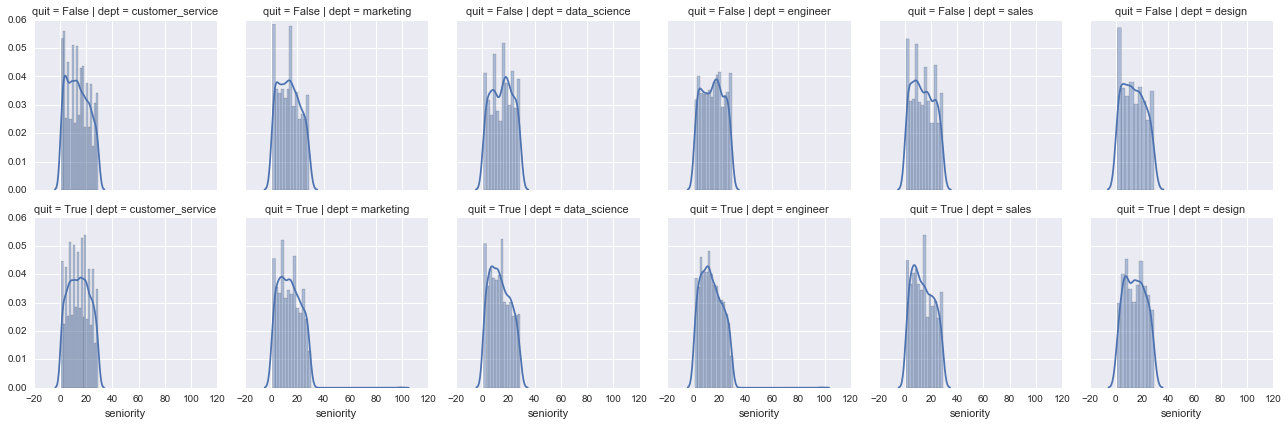

In [79]:
g = sns.FacetGrid(data, row='quit', col='dept', aspect=1)
g = g.map(sns.distplot, "seniority")

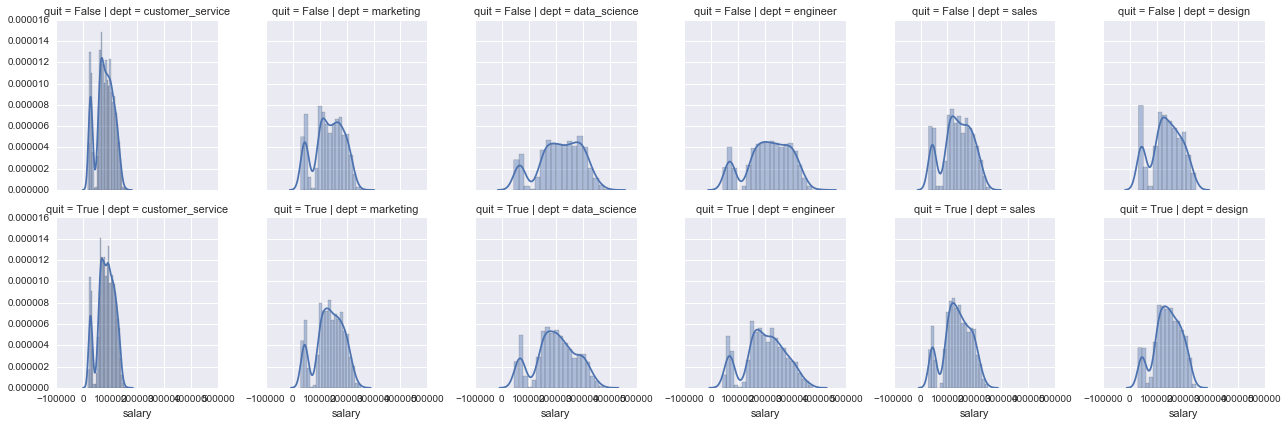

In [81]:
g = sns.FacetGrid(data, row='quit', col='dept', aspect=1)
g = g.map(sns.distplot, "salary")

## Headcount

In [142]:
test = data.copy()

In [158]:
joins = data.groupby([ 'join_date', 'company_id' ]).size().reset_index()
quits = data.groupby([ 'quit_date', 'company_id' ]).size().reset_index()

cum  = pd.merge(joins,  quits, left_on=[ 'join_date', 'company_id' ], right_on=[ 'quit_date', 'company_id' ], how='outer' )
cum[['0_x', '0_y']] = cum[['0_x', '0_y']].fillna(0)
cum['diff'] = cum['0_x'] - cum['0_y']
cum.head()

,join_date,company_id,0_x,quit_date,0_y,diff
0,2011-01-24,1.0,25.0,NaT,0.0,25.0
1,2011-01-24,2.0,17.0,NaT,0.0,17.0
2,2011-01-24,3.0,9.0,NaT,0.0,9.0
3,2011-01-24,4.0,12.0,NaT,0.0,12.0
4,2011-01-24,5.0,5.0,NaT,0.0,5.0


## Predicting Count

In [ ]:
f(people | days_from_0, company_id, features) ~ 
    f(people | days_from_0, company_id, count_total, deparment:count, department:salary:%, deparment:seniority:% )

## Predict churn

In [167]:
train = data[ (data.duration < 365) | (data.duration.isnull())]
x     = pd.get_dummies(train[['company_id', 'dept', 'seniority', 'salary']])
y     = (~train.duration.isnull()).astype('int')

In [173]:
from sklearn.tree import *

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x,y) 
dt.score(x,y)

0.75252117789431228

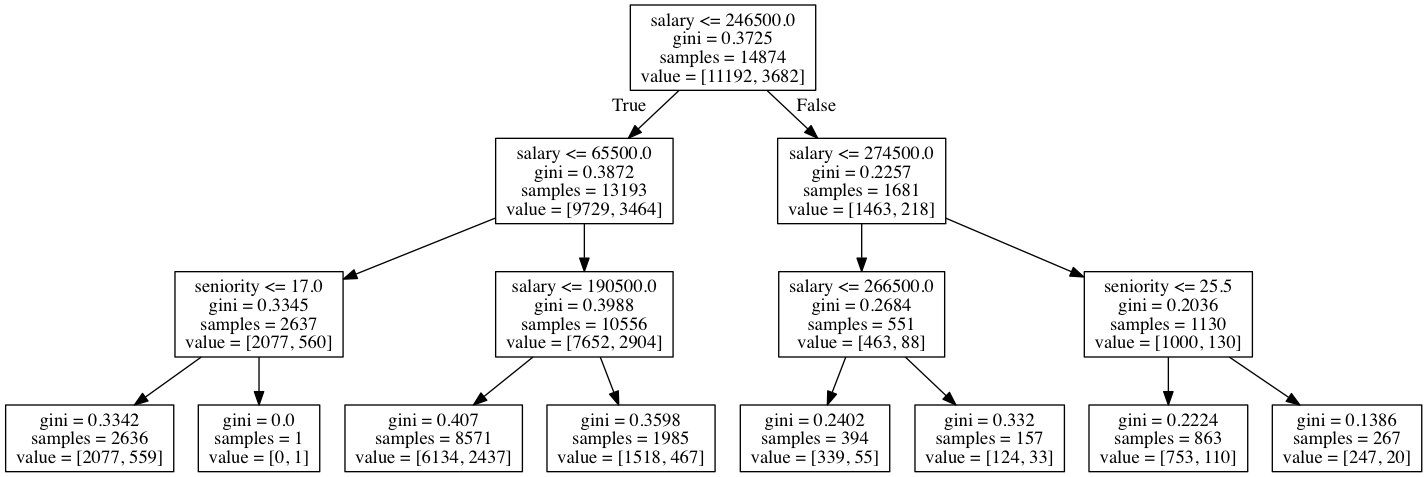

In [174]:
from IPython.display import Image  
import pydotplus 
dot_data = export_graphviz(dt, out_file=None, feature_names=x.columns)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 